In [1]:
import pandas as pd
import numpy as np
import re
import os
os.chdir('c://users//administrator//desktop//Projects//Titanic')

In [2]:
data = pd.read_csv('t_train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
np.sum(data.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#DATA CLEAN

In [6]:
data['Age'].fillna(data.Age.mean(),inplace =True)
data['Embarked'].fillna(data.Embarked.value_counts().index[0], inplace = True)

In [7]:
def cabinlable(x):
    if x is not np.NAN:
        return x[0]

In [8]:
data['Cabin'] = data['Cabin'].apply(cabinlable)

In [9]:
data['Cabin'].fillna('NC', inplace =True)

In [10]:
data.Cabin.value_counts()

NC    687
C      59
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin, dtype: int64

In [11]:
np.sum(data.isna())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
def who(x):
    stri =str(x.split(' ')[1])
    return re.sub('[^a-zA-Z]+','',stri)

In [13]:
data['titles'] = data['Name'].apply(who)

data.titles.value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Impe             3
Planke           3
Major            2
Mlle             2
Col              2
Gordon           2
Carlo            1
the              1
Shawah           1
Jonkheer         1
Mulder           1
Billiard         1
Mme              1
Walle            1
Steen            1
Ms               1
Pelsmaeker       1
der              1
Cruyssen         1
Capt             1
Velde            1
Melkebeke        1
Messemaeker      1
Don              1
Name: titles, dtype: int64

In [14]:
#data['titles'] = np.where(data['titles'] in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Dr'],'Mr',\
                         #np.where(data['titles'] in ['Countess', 'Mme'],'Mrs',\
                                # np.where(data['titles'] in ['Mlle', 'Ms'],'Miss',data['titles'])))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NC,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NC,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NC,S,Mr


In [15]:
def replace_titles(x):
    title=x['titles']
    if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Mrs','Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Miss','Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return 'other'

In [16]:
data['titles'] = data.apply(replace_titles,axis=1)

In [17]:
data.titles.value_counts()

Mr       515
Miss     182
Mrs      129
other     65
Name: titles, dtype: int64

In [18]:
data.Cabin.value_counts()

NC    687
C      59
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin, dtype: int64

In [19]:
data['Family_Size']=data['SibSp']+data['Parch']      ### szie of family abord

data['Age_Pclass'] = data['Age']* data['Pclass']     ## AGE AND AGE CLASS CAN BE MULTILIED AS THEY REFER TO THE SAME THING

In [20]:
data1 = data.drop(['PassengerId','Name','Ticket','SibSp','Parch','Age','Pclass'],axis =1)

In [21]:
data1.head()

,Survived,Sex,Fare,Cabin,Embarked,titles,Family_Size,Age_Pclass
0,0,male,7.2500,NC,S,Mr,1,66.0
1,1,female,71.2833,C,C,Mrs,1,38.0
2,1,female,7.9250,NC,S,Miss,0,78.0
3,1,female,53.1000,C,S,Mrs,1,35.0
4,0,male,8.0500,NC,S,Mr,0,105.0


In [22]:
## CORRELATION

In [23]:
import seaborn as sb
data1.corr()

,Survived,Fare,Family_Size,Age_Pclass
Survived,1.000000,0.257307,0.016639,-0.326357
Fare,0.257307,1.000000,0.217138,-0.356239
Family_Size,0.016639,0.217138,1.000000,-0.194599
Age_Pclass,-0.326357,-0.356239,-0.194599,1.000000


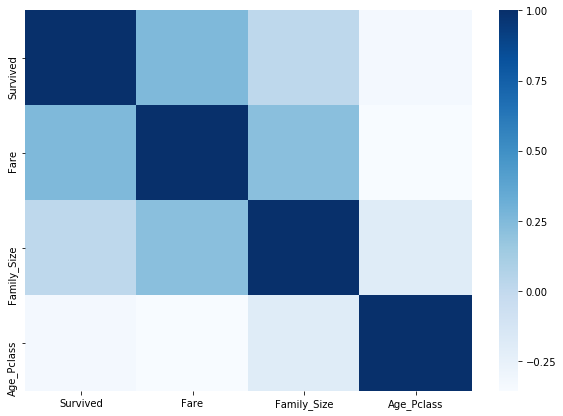

In [24]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10,7]
sb.heatmap(data1.corr(),cmap = 'Blues')

In [25]:
##DUMMIES & Scaling

In [26]:
data1_dum = pd.get_dummies(data1)

In [27]:
data1_dum.head()

,Survived,Fare,Family_Size,Age_Pclass,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_G,Cabin_NC,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,titles_Miss,titles_Mr,titles_Mrs,titles_other
0,0,7.2500,1,66.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,71.2833,1,38.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,7.9250,0,78.0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,53.1000,1,35.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,8.0500,0,105.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler 

mms =MinMaxScaler()

In [29]:
data2 = mms.fit_transform(data1_dum)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
data2 = pd.DataFrame(data2,columns= data1_dum.columns)
data2.head()

,Survived,Fare,Family_Size,Age_Pclass,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_G,Cabin_NC,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,titles_Miss,titles_Mr,titles_Mrs,titles_other
0,0.0,0.014151,0.1,0.294373,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.139136,0.1,0.167722,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.015469,0.0,0.348652,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.103644,0.1,0.154152,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.015713,0.0,0.470780,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
## LABELECODER & SACLING

In [32]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

In [33]:
data1_lab = data1.apply(le.fit_transform)

In [34]:
data1_lab.head()

,Survived,Sex,Fare,Cabin,Embarked,titles,Family_Size,Age_Pclass
0,0,1,18,7,2,1,1,69
1,1,0,207,2,0,2,1,38
2,1,0,41,7,2,0,0,81
3,1,0,189,2,2,2,1,35
4,0,1,43,7,2,1,0,102


In [35]:
from sklearn.preprocessing import MinMaxScaler 

mms = MinMaxScaler()

data3 = mms.fit_transform(data1_lab)
data3 = pd.DataFrame(data3,columns= data1_lab.columns)

data3.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Survived,Sex,Fare,Cabin,Embarked,titles,Family_Size,Age_Pclass
0,0.0,1.0,0.072874,0.875,1.0,0.333333,0.125,0.530769
1,1.0,0.0,0.838057,0.250,0.0,0.666667,0.125,0.292308
2,1.0,0.0,0.165992,0.875,1.0,0.000000,0.000,0.623077
3,1.0,0.0,0.765182,0.250,1.0,0.666667,0.125,0.269231
4,0.0,1.0,0.174089,0.875,1.0,0.333333,0.000,0.784615


In [36]:
## SPLITTING

In [37]:
from sklearn.model_selection import train_test_split as tts

In [38]:
x = data2.drop(['Survived'],axis =1)
y = data2['Survived']

In [39]:
x_tr,x_ts,y_tr,y_ts = tts(x,y,test_size = 0.2, random_state = 3)

In [40]:
x1 = data3.drop(['Survived'],axis =1)
y1 = data3['Survived']

In [41]:
x1_tr,x1_ts,y1_tr,y1_ts = tts(x1,y1,test_size = 0.8, random_state =10)

In [42]:
###   USING LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

lr.fit(x_tr,y_tr)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
lr.score(x_tr,y_tr)

0.8216292134831461

In [46]:
lr.score(x_ts,y_ts)

0.7988826815642458

In [47]:
lr2 = LogisticRegression()

lr2.fit(x1_tr,y1_tr)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
lr2.score(x1_tr,y1_tr)

0.8258426966292135

In [49]:
lr2.score(x1_ts,y1_ts)

0.7924263674614306

In [50]:
###KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

knn.fit(x1_tr,y1_tr)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
knn.score(x1_tr,y1_tr)

0.8651685393258427

In [54]:
knn.score(x1_ts,y1_ts)

0.8008415147265077

In [55]:
#Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators= 151 , n_jobs=2)

In [58]:
## with dummies

rf.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=151, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
rf.score(x_tr,y_tr)

0.9873595505617978

In [60]:
rf.score(x_ts,y_ts)

0.8044692737430168

In [61]:
## with lable encoder

rf2 = RandomForestClassifier(n_estimators= 251 , n_jobs=2)

rf2.fit(x1_tr,y1_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=251, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rf2.score(x1_tr,y1_tr)

0.9943820224719101

In [63]:
rf2.score(x1_ts,y1_ts)

0.7994389901823282

In [64]:
### ADABOOST

In [65]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=351)

abc.fit(x_tr,y_tr)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=351, random_state=None)

In [66]:
abc.score(x_tr,y_tr)

0.8637640449438202

In [67]:
abc.score(x_ts,y_ts)

0.8212290502793296

In [68]:
### GRADIENT BOOSTING 

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=251,random_state = 3)

gbc.fit(x_tr,y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=251,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
gbc.score(x_tr,y_tr)

0.952247191011236

In [71]:
gbc.score(x_ts,y_ts)

0.8156424581005587

In [72]:
gbc2 = GradientBoostingClassifier(n_estimators=251,random_state = 3)

gbc2.fit(x1_tr,y1_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=251,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [73]:
gbc2.score(x1_ts,y1_ts)

0.7671809256661991

In [74]:
### NUERAL NETWORKS

In [79]:
from sklearn.neural_network import multilayer_perceptron

mlp = multilayer_perceptron()

In [ ]:
## ENSAMBLE

In [76]:
from sklearn.ensemble import VotingClassifier


In [77]:
vc = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('gbc', gbc)], voting='hard',weights=[1,1,2])

vc.fit(x_tr,y_tr)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard',
         weights=[1, 1, 2])

In [78]:
vc.score(x_ts,y_ts)

0.8268156424581006